## Imports

In [1]:
%matplotlib inline

import seaborn as sns
import numpy as np

from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten, Dropout, Reshape
from keras.layers.recurrent import LSTM
from keras.layers import Convolution2D, MaxPooling2D

Using TensorFlow backend.


## Constants

In [2]:
img_rows, img_cols = 28, 28
in_shape = (img_rows, img_cols, 1)
batch_size = 256
nb_epoch = 3

## Data

In [3]:
X_train = np.random.rand(10000, 28, 28, 1)
Y_train = np.random.rand(10000, 1)
X_test = np.random.rand(1000, 28, 28, 1)

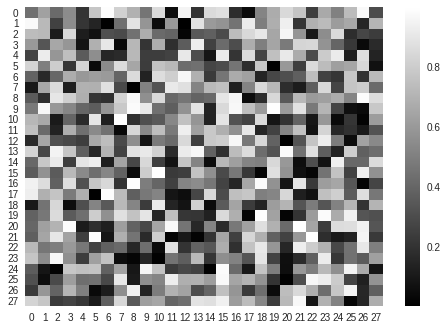

In [4]:
sns.heatmap(X_train[0].reshape(28,28), cmap='gray')

## Train Data

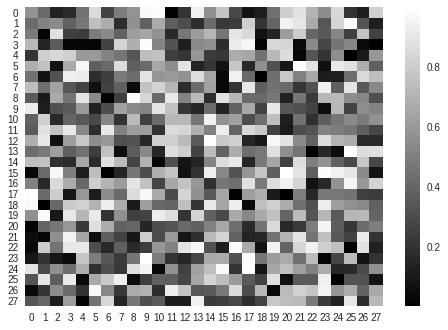

In [5]:
X_train = np.random.rand(10000, 28, 28, 1)
sns.heatmap(X_train[0].reshape(28, 28), cmap='gray')

In [6]:
Y_train = np.random.rand(10000, 1)
Y_train[0]

array([ 0.748071])

## Test Data

In [7]:
X_test = np.random.rand(1024, 28, 28, 1)

# Model

In [13]:
model = Sequential()
model.add(Convolution2D(32, 3, 3, border_mode='same', activation='relu', input_shape=in_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(64, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(128, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

In [15]:
model.add(Reshape((1, -1)))
model.add(LSTM(100)) #return_sequences=True
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_4 (Convolution2D)  (None, 28, 28, 32)    320         convolution2d_input_2[0][0]      
____________________________________________________________________________________________________
maxpooling2d_4 (MaxPooling2D)    (None, 14, 14, 32)    0           convolution2d_4[0][0]            
____________________________________________________________________________________________________
convolution2d_5 (Convolution2D)  (None, 14, 14, 64)    18496       maxpooling2d_4[0][0]             
____________________________________________________________________________________________________
maxpooling2d_5 (MaxPooling2D)    (None, 7, 7, 64)      0           convolution2d_5[0][0]            
___________________________________________________________________________________________

## Train model
I think it is just learning to output .5 to minimize loss as we are using completely random training data

In [ ]:
model.fit(X_train, Y_train, # specify training data
          batch_size=1, # use this many images per mini-batch - memory dependent - 256
          nb_epoch=100, # go through my training data this number of times - 3
          shuffle=False,
          verbose=True # please print things 
         )

Epoch 1/100
 4697/10000 [=============>................] - ETA: 24s - loss: 0.0861

### Predictions

In [ ]:
predictions = model.predict(X_test)

In [ ]:
predictions.mean()

In [ ]:
Y_train.mean()